<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/grouping_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

groupby()
- Data analysis often requires splitting data based on criteria.
- The groupby function in pandas is a powerful tool for splitting your data into groups, applying a function to each group, and then combining the results into a data structure.
- This “split-apply-combine” strategy allows you to easily perform operations like aggregations, transformations, and filtering on groups of data.

Key functionalities:
- Grouping by features (hierarchical).
- Aggregating datasets by groups.
- Applying custom aggregation functions.
- Transforming datasets group-wise.

The pandas groupby method performs two essential functions:
- It splits the data into groups based on some criteria.
- It applies a function to each group independently.

Requires a dataset with numerical and categorical data for effective grouping.


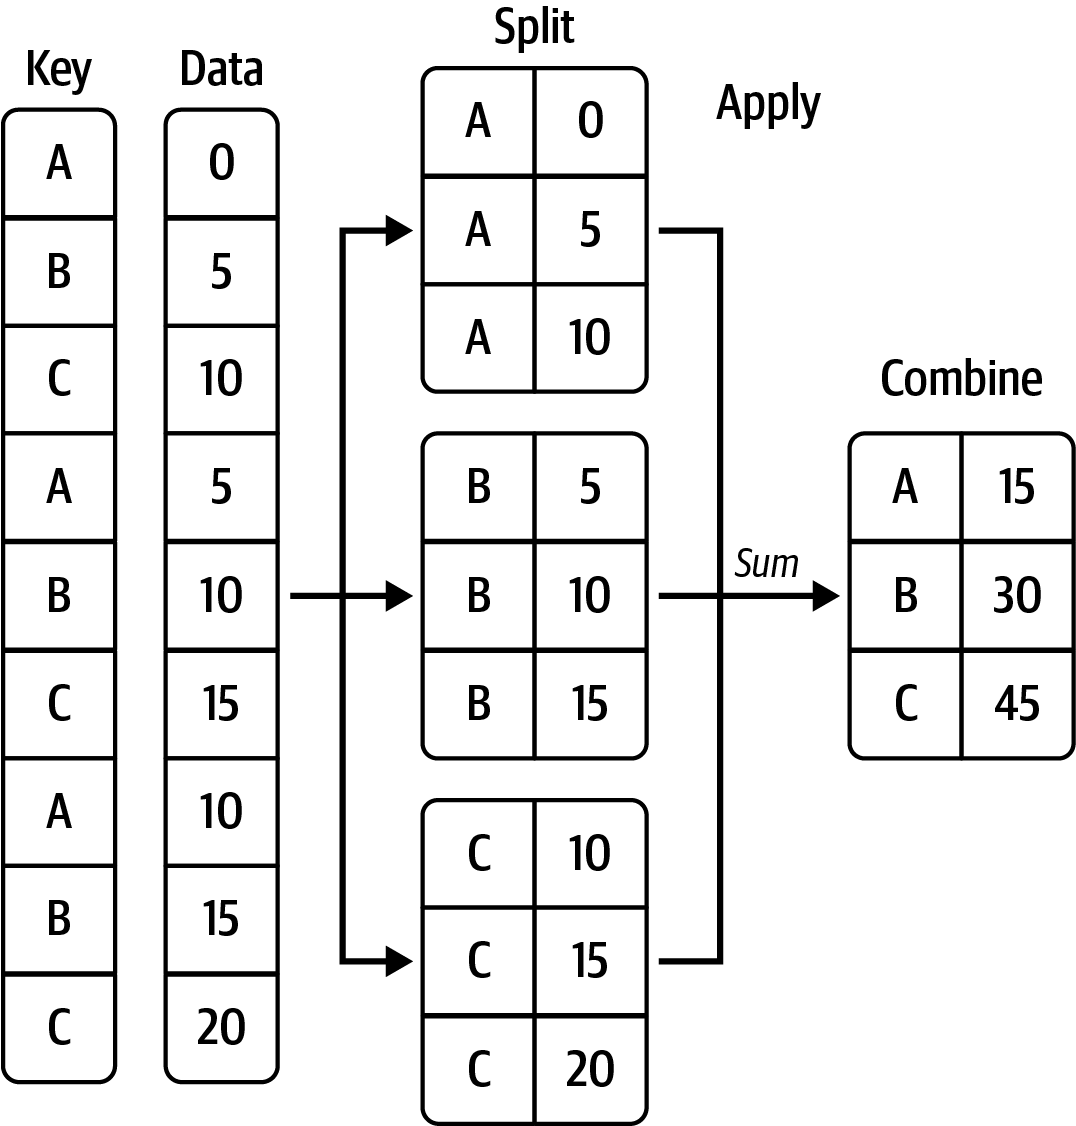

Example: Let's take a look at a dataset of automobiles that enlists the different features and attributes
of cars, such as symbolling, normalized-losses, make, aspiration, body-style,
drive-wheels, engine-location, and many others.

1. Let's start by importing the required Python libraries and datasets:

In [ ]:
import pandas as pd
df = pd.read_csv("Automobile_data.csv")
print("Head")
print(df.head(5))



Head
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-rati

2. Using the groupby() function lets us group this dataset on the basis of the body-style column:

In [ ]:
print(df.groupby("body-style").head(3))
print(df.groupby("body-style").groups)
print(df.groupby("body-style").groups.keys())


    symboling normalized-losses           make fuel-type aspiration  \
0           3                 ?    alfa-romero       gas        std   
1           3                 ?    alfa-romero       gas        std   
2           1                 ?    alfa-romero       gas        std   
3           2               164           audi       gas        std   
4           2               164           audi       gas        std   
5           2                 ?           audi       gas        std   
7           1                 ?           audi       gas        std   
9           0                 ?           audi       gas      turbo   
18          2               121      chevrolet       gas        std   
28         -1               110          dodge       gas        std   
36          0                78          honda       gas        std   
69          0                93  mercedes-benz    diesel      turbo   
72          3               142  mercedes-benz       gas        std   
74    

From the preceding output, we know that the body-style column has five unique values:
  - convertible
  - hardtop
  - hatchback
  - sedan
  - wagon

**Accessing a Specific Group**

In [ ]:
style = df.groupby("body-style").get_group("convertible")
print(style)

     symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
72           3               142  mercedes-benz       gas        std   
128          3                 ?        porsche       gas        std   
172          2               134         toyota       gas        std   
189          3                 ?     volkswagen       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
72           two  convertible          rwd           front        96.6  ...   
128          two  convertible          rwd            rear        89.5  ...   
172          two  convertible          rwd           front        98.4  ...   
189          two  con

Explanation:

- Creates a DataFrameGroupBy object named "style".
- style.get_group("convertible") retrieves the DataFrame containing only "convertible" body styles.

- In the preceding example, we have grouped by using a single body-style column.
- We can also select a subset of columns.

Selecting a subset of columns:

- To form groups based on multiple categories, we can simply specify the column names in the groupby() function.
- Grouping will be done simultaneously with the first category, the second category, and so on.

In [ ]:
double_grouping = df.groupby(["body-style","drive-wheels"])
double_grouping.first()

symboling normalized-losses           make  \
body-style  drive-wheels                                               
convertible fwd                   3                 ?     volkswagen   
            rwd                   3                 ?    alfa-romero   
hardtop     fwd                   2               168         nissan   
            rwd                   0                93  mercedes-benz   
hatchback   4wd                   0                 ?           audi   
            fwd                   2               121      chevrolet   
            rwd                   1                 ?    alfa-romero   
sedan       4wd                   2               164           audi   
            fwd                   2               164           audi   
            rwd                   2               192            bmw   
wagon       4wd                   0                85         subaru   
            fwd                   1                 ?           audi   
            rwd                  -1                93  mercedes-benz   

                         fuel-type aspiration num-of-doors engine-location  \
body-style  drive-wheels                                                     
convertible fwd                gas        std          two           front   
            rwd                gas        std          two           front   
hardtop     fwd                gas        std          two           front   
            rwd             diesel      turbo          two           front   
hatchback   4wd                gas      turbo          two           front   
            fwd                gas        std          two           front   
            rwd                gas        std          two           front   
sedan       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd                gas        std          two           front   
wagon       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd             diesel      turbo         four           front   

                          wheel-base  length  width  ...  engine-size  \
body-style  drive-wheels                             ...                
convertible fwd                 94.5   159.3   64.2  ...          109   
            rwd                 88.6   168.8   64.1  ...          130   
hardtop     fwd                 95.1   162.4   63.8  ...           97   
            rwd                106.7   187.5   70.3  ...          183   
hatchback   4wd                 99.5   178.2   67.9  ...          131   
            fwd                 88.4   141.1   60.3  ...           61   
            rwd                 94.5   171.2   65.5  ...          152   
sedan       4wd                 99.4   176.6   66.4  ...          136   
            fwd                 99.8   176.6   66.2  ...          109   
            rwd                101.2   176.8   64.8  ...          108   
wagon       4wd                 96.9   173.6   65.4  ...          108   
            fwd                105.8   192.7   71.4  ...          136   
            rwd                110.0   190.9   70.3  ...          183   

                          fuel-system  bore stroke  compression-ratio  \
body-style  drive-wheels                                                
convertible fwd                  mpfi  3.19    3.4                8.5   
            rwd                  mpfi  3.47   2.68                9.0   
hardtop     fwd                  2bbl  3.15   3.29                9.4   
            rwd                   idi  3.58   3.64               21.5   
hatchback   4wd                  mpfi  3.13    3.4                7.0   
            fwd                  2bbl  2.91   3.03                9.5   
            rwd                  mpfi  2.68   3.47                9.0   
sedan       4wd      

Aggregation on Grouped Data

Pandas allows applying arithmetic operations directly to grouped data.
Common aggregation functions:
- max(): Maximum value.
- min(): Minimum value.
- mean(): Average value.
- first(): First value.
- last(): Last value.

In [ ]:
style['normalized-losses'].max()

,normalized-losses
body-style,
convertible,?
hardtop,?
hatchback,?
sedan,?
wagon,?


In [ ]:
style['normalized-losses'].min()

,normalized-losses
body-style,
convertible,134
hardtop,134
hatchback,101
sedan,102
wagon,103


In [ ]:
style.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# get mean of each column of specific group
style.get_group("convertible").mean()

TypeError: Could not convert ['??142?134?' 'alfa-romeroalfa-romeromercedes-benzporschetoyotavolkswagen'
 'gasgasgasgasgasgas' 'stdstdstdstdstdstd' 'twotwotwotwotwotwo'
 'convertibleconvertibleconvertibleconvertibleconvertibleconvertible'
 'rwdrwdrwdrwdrwdfwd' 'frontfrontfrontrearfrontfront'
 'dohcdohcohcvohcfohcohc' 'fourfoureightsixfourfour'
 'mpfimpfimpfimpfimpfimpfi' '3.473.473.463.743.623.19'
 '2.682.683.12.93.53.4' '11111115520711690' '500050004750590048005500'
 '134951650035056370281766911595'] to numeric

In [ ]:
# get the number of symboling/records in each group
style['symboling'].count()

,symboling
body-style,
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


In [ ]:
import pandas as pd

data = {'group' : ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'values' : ["0", "5", "10", "?", "10", "15", "10", "15", "20"]}
df_data = pd.DataFrame(data)
print(df_data)

print(df_data.info())

grouped_df = df_data.groupby('group')

print("\nMaximum")
print(grouped_df['values'].max())

print("\nMinimum")
print(grouped_df['values'].min())

  group values
0     A      0
1     B      5
2     C     10
3     A      ?
4     B     10
5     C     15
6     A     10
7     B     15
8     C     20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   9 non-null      object
 1   values  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes
None

Maximum
group
A     ?
B     5
C    20
Name: values, dtype: object

Minimum
group
A     0
B    10
C    10
Name: values, dtype: object


- Lexicographical Order: When you compare strings like "10" and "5", the comparison is done character by character. "10" is considered smaller than "5" because "1" comes before "5" in the ASCII table. This is the opposite of how we compare numbers.
- No Numerical Operations: You cannot perform standard arithmetic operations (sum, mean, etc.) on strings. Trying to sum "10" and "5" as strings will result in "105" (concatenation) or a TypeError.
- Meaningless Results: The min and max functions, when applied to strings, give you the lexicographically smallest and largest strings, which have no numerical meaning.

In [ ]:
import pandas as pd
import numpy as np
data = {'group' : ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'values' : ["0", "5", "10", "?", "10", "15", "10", "15", "20"]}
df_data = pd.DataFrame(data)
print(df_data)

df_data['values'] = df_data['values'].replace("?",np.nan)
df_data['values'] = df_data['values'].astype(float)
print(df_data)

print(df_data.info())

grouped_df = df_data.groupby('group')
print(grouped_df.groups)

print("\nMaximum")
print(grouped_df['values'].max())

print("\nMinimum")
print(grouped_df['values'].min())

print("\nMean")
print(grouped_df['values'].mean())

print("\nMedian")
print(grouped_df['values'].median())

print("\nStandard Deviation")
print(grouped_df['values'].std())

  group values
0     A      0
1     B      5
2     C     10
3     A      ?
4     B     10
5     C     15
6     A     10
7     B     15
8     C     20
  group  values
0     A     0.0
1     B     5.0
2     C    10.0
3     A     NaN
4     B    10.0
5     C    15.0
6     A    10.0
7     B    15.0
8     C    20.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   9 non-null      object 
 1   values  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 276.0+ bytes
None
{'A': [0, 3, 6], 'B': [1, 4, 7], 'C': [2, 5, 8]}

Maximum
group
A    10.0
B    15.0
C    20.0
Name: values, dtype: float64

Minimum
group
A     0.0
B     5.0
C    10.0
Name: values, dtype: float64

Mean
group
A     5.0
B    10.0
C    15.0
Name: values, dtype: float64

Median
group
A     5.0
B    10.0
C    15.0
Name: values, dtype: float64

Standard Deviation
group
A    7.071068

In [ ]:
import pandas as pd

# Creating a sample DataFrame
data = {
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Furniture'],
    'Sales': [100, 200, 150, 300, 250]
}
df = pd.DataFrame(data)

# Grouping by 'Category' and summing the sales
grouped_df = df.groupby('Category')['Sales'].sum()
print(grouped_df)


Category
Clothing       450
Electronics    300
Furniture      250
Name: Sales, dtype: int64


In [ ]:
df.groupby('Category').sum()

,Sales
Category,
Clothing,450
Electronics,300
Furniture,250


In [ ]:
data = {
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Furniture'],
    'Region': ['North', 'South', 'North', 'South', 'North'],
    'Sales': [100, 200, 150, 300, 250]
}
df = pd.DataFrame(data)

# Grouping by both Category and Region
grouped_df = df.groupby(['Category', 'Region']).sum()
print(grouped_df)


                    Sales
Category    Region       
Clothing    North     150
            South     300
Electronics North     100
            South     200
Furniture   North     250


In [ ]:
import pandas as pd

# Creating an enhanced DataFrame
data = {
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Furniture',
                 'Electronics', 'Clothing', 'Furniture', 'Furniture', 'Electronics'],
    'Region': ['North', 'South', 'North', 'South', 'North',
               'South', 'North', 'South', 'North', 'South'],
    'Sales': [100, 200, 150, 300, 250, 400, 120, 350, 275, 500],
    'Quantity': [1, 2, 3, 4, 2, 5, 2, 3, 1, 6],
    'Discount': [5, 10, 0, 15, 7, 8, 5, 12, 10, 9],
    'Customer_Type': ['New', 'Returning', 'New', 'Returning', 'New',
                      'Returning', 'New', 'Returning', 'New', 'Returning']
}

df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)


      Category Region  Sales  Quantity  Discount Customer_Type
0  Electronics  North    100         1         5           New
1  Electronics  South    200         2        10     Returning
2     Clothing  North    150         3         0           New
3     Clothing  South    300         4        15     Returning
4    Furniture  North    250         2         7           New
5  Electronics  South    400         5         8     Returning
6     Clothing  North    120         2         5           New
7    Furniture  South    350         3        12     Returning
8    Furniture  North    275         1        10           New
9  Electronics  South    500         6         9     Returning


In [ ]:
grouped_df = df.groupby(['Category','Region']).sum()
print(grouped_df)

                    Sales  Quantity  Discount                Customer_Type
Category    Region                                                        
Clothing    North     270         5         5                       NewNew
            South     300         4        15                    Returning
Electronics North     100         1         5                          New
            South    1100        13        27  ReturningReturningReturning
Furniture   North     525         3        17                       NewNew
            South     350         3        12                    Returning


In [ ]:
df.groupby('Category')[df.select_dtypes(include='number').columns].sum()


,Sales,Quantity,Discount
Category,,,
Clothing,570,9,20
Electronics,1200,14,32
Furniture,875,6,29


In [ ]:
df.groupby(['Category','Region'])[df.select_dtypes(include='number').columns].sum()

Sales  Quantity  Discount
Category    Region                           
Clothing    North     270         5         5
            South     300         4        15
Electronics North     100         1         5
            South    1100        13        27
Furniture   North     525         3        17
            South     350         3        12

In [ ]:
category_sales_stats = df.groupby(['Category','Region'])[df.select_dtypes(include='number').columns].agg(['min', 'max', 'mean', 'median', 'sum', 'std'])
print(category_sales_stats)


                   Sales                                           Quantity  \
                     min  max        mean median   sum         std      min   
Category    Region                                                            
Clothing    North    120  150  135.000000  135.0   270   21.213203        2   
            South    300  300  300.000000  300.0   300         NaN        4   
Electronics North    100  100  100.000000  100.0   100         NaN        1   
            South    200  500  366.666667  400.0  1100  152.752523        2   
Furniture   North    250  275  262.500000  262.5   525   17.677670        1   
            South    350  350  350.000000  350.0   350         NaN        3   

                                                      Discount            \
                   max      mean median sum       std      min max  mean   
Category    Region                                                         
Clothing    North    3  2.500000    2.5   5  0.707107       

# Data aggregation

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "length": [150, 170, 180, 190],
    "width": [50, 55, 60, 62],
    "height": [140, 145, 150, 155],
    "curbweight": [2000, 2500, 2800, 3000],
    "price": [15000, 18000, 20000, 22000]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Creating a subset with numeric columns
new_dataset = df.filter(["length", "width", "height", "curbweight", "price"], axis=1)
print("\nnew_dataset")
print(new_dataset)

# Applying single aggregation (mean)
mean_values = new_dataset.agg("mean")
print("\nMean of each column:\n", mean_values)

# Applying multiple aggregations (sum and min)
agg_results = new_dataset.agg(["sum", "min"])
print("\nAggregation (sum & min):\n", agg_results)

# Applying different aggregations to specific columns
custom_agg = new_dataset.aggregate({
    "length": ['sum', 'min'],
    "width": ['max', 'min'],
    "height": ['min', 'sum'],
    "curbweight": ['sum']
})
print("\nCustom Aggregation:\n", custom_agg)


Original DataFrame:
    length  width  height  curbweight  price
0     150     50     140        2000  15000
1     170     55     145        2500  18000
2     180     60     150        2800  20000
3     190     62     155        3000  22000

new_dataset
   length  width  height  curbweight  price
0     150     50     140        2000  15000
1     170     55     145        2500  18000
2     180     60     150        2800  20000
3     190     62     155        3000  22000

Mean of each column:
 length          172.50
width            56.75
height          147.50
curbweight     2575.00
price         18750.00
dtype: float64

Aggregation (sum & min):
      length  width  height  curbweight  price
sum     690    227     590       10300  75000
min     150     50     140        2000  15000

Custom Aggregation:
      length  width  height  curbweight
sum   690.0    NaN   590.0     10300.0
min   150.0   50.0   140.0         NaN
max     NaN   62.0     NaN         NaN


Group-wise operations

- The most important operations groupBy implements are aggregate, filter, transform, and
apply.
- An efficient way of implementing aggregation functions in the dataset is by doing so
after grouping the required columns.
- The aggregated function will return a single
aggregated value for each group.
- Once these groups have been created, we can apply
several aggregation operations to that grouped data.

1. Modify the DataFrame to Include a Categorical Column

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset with an added category column
data = {
    "category": ["Sedan", "Sedan", "SUV", "SUV"],
    "length": [150, 170, 180, 190],
    "width": [50, 55, 60, 62],
    "height": [140, 145, 150, 155],
    "curbweight": [2000, 2500, 2800, 3000],
    "price": [15000, 18000, 20000, 22000]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)


Original DataFrame:
   category  length  width  height  curbweight  price
0    Sedan     150     50     140        2000  15000
1    Sedan     170     55     145        2500  18000
2      SUV     180     60     150        2800  20000
3      SUV     190     62     155        3000  22000


2. Group the Data by Category and Aggregate

In [ ]:
# Grouping by 'category' and applying aggregations
grouped_df = df.groupby("category").agg(
    {
        "height": "min",  # Minimum height in each category
        "length": "max",  # Maximum length in each category
        "price": "mean",  # Average price in each category
    }
)
print("\nGrouped Aggregation:\n", grouped_df)



Grouped Aggregation:
           height  length    price
category                         
SUV          150     190  21000.0
Sedan        140     170  16500.0


Using NumPy Functions for Aggregation

- We can also use NumPy functions like np.sum, np.mean, and np.std in the aggregation.

In [ ]:
# Using NumPy functions for aggregation
np_grouped = df.groupby("category")["price"].agg([np.sum, np.mean, np.std])
print("\nAggregations using NumPy functions:\n", np_grouped)



Aggregations using NumPy functions:
             sum     mean          std
category                             
SUV       42000  21000.0  1414.213562
Sedan     33000  16500.0  2121.320344


<ipython-input-10-09a3be13ba5e>:2: FutureWarning: The provided callable <function sum at 0x7e26bf5b82c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  np_grouped = df.groupby("category")["price"].agg([np.sum, np.mean, np.std])
<ipython-input-10-09a3be13ba5e>:2: FutureWarning: The provided callable <function mean at 0x7e26bf5b93a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  np_grouped = df.groupby("category")["price"].agg([np.sum, np.mean, np.std])
<ipython-input-10-09a3be13ba5e>:2: FutureWarning: The provided callable <function std at 0x7e26bf5b94e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  np_grouped = d

##Renaming grouped aggregation columns

Renaming Aggregation Columns:
"max_price" → Maximum price in each category.
"min_price" → Minimum price in each category.
"avg_price" → Average price in each category.

In [ ]:
import pandas as pd

# Sample dataset
data = {
    "category": ["SUV", "SUV", "Sedan", "Sedan"],
    "length": [150, 170, 180, 190],
    "width": [50, 55, 60, 62],
    "height": [140, 145, 150, 155],
    "curbweight": [2000, 2500, 2800, 3000],
    "price": [15000, 18000, 16000, 17000]
}

df = pd.DataFrame(data)

# Grouping by category and applying named aggregations
grouped_df = df.groupby("category").agg(
    max_price=('price', 'max'),  # Maximum price in each category
    min_price=('price', 'min'),  # Minimum price in each category
    avg_price=('price', 'mean')  # Average price in each category
)

print("\nGrouped Aggregation with Renamed Columns:\n", grouped_df)



Grouped Aggregation with Renamed Columns:
           max_price  min_price  avg_price
category                                 
SUV           18000      15000    16500.0
Sedan         17000      16000    16500.0


## Group-wise transformations

- When working with groupby() and aggregation, you might wonder:

Question: "Why can’t we apply a group operation and add the result back into the original DataFrame in one step?"

- The answer is: We can! Using transform() instead of agg().

Difference Between Aggregation (agg()) and Transformation (transform())
- Aggregation (agg()): Summarizes data by reducing the number of rows.
  - Example: If we group by "category" and calculate the mean price, we get one row per category.
- Transformation (transform()): Applies a function to each row while keeping the original DataFrame size.
  - Example: If we group by "category" and calculate the mean price, each row still shows the mean price for its group.


- agg() → Reduces the data (e.g., sum, mean, count for each group).
- transform() → Maintains the data size (each row gets a value based on its group).

In [ ]:
import pandas as pd

# Sample dataset
data = {
    "category": ["SUV", "SUV", "Sedan", "Sedan"],
    "length": [150, 170, 180, 190],
    "width": [50, 55, 60, 62],
    "height": [140, 145, 150, 155],
    "curbweight": [2000, 2500, 2800, 3000],
    "price": [15000, 18000, 16000, 17000]
}

df = pd.DataFrame(data)

# 1. Increase the price of each car by 10%
df["price"] = df["price"].transform(lambda x: x + x / 10)

print("\nUpdated Price Column after 10% Increase:\n", df["price"])

# 2. Compute the average price of cars for each category using `transform()`
df["average_price"] = df.groupby("category")["price"].transform('mean')

# 3. Selecting relevant columns to observe the result
print("\nDataFrame with Transformed Average Price:\n", df.loc[:, ["category", "price", "average_price"]])



Updated Price Column after 10% Increase:
 0    16500.0
1    19800.0
2    17600.0
3    18700.0
Name: price, dtype: float64

DataFrame with Transformed Average Price:
   category    price  average_price
0      SUV  16500.0        18150.0
1      SUV  19800.0        18150.0
2    Sedan  17600.0        18150.0
3    Sedan  18700.0        18150.0


Aggregate Functions used with groupby

Built-in aggregation methods
Many common aggregations are built-in to GroupBy objects as methods. Of the methods listed below, those with a * do not have an efficient, GroupBy-specific, implementation.

Method

Description

any() - Compute whether any of the values in the groups are truthy

all() - Compute whether all of the values in the groups are truthy

count() - Compute the number of non-NA values in the groups

cov() * - Compute the covariance of the groups

first() - Compute the first occurring value in each group

idxmax() - Compute the index of the maximum value in each group

idxmin() - Compute the index of the minimum value in each group

last() - Compute the last occurring value in each group

max() - Compute the maximum value in each group

mean() - Compute the mean of each group

median() - Compute the median of each group

min() - Compute the minimum value in each group

nunique() - Compute the number of unique values in each group

prod() - Compute the product of the values in each group

quantile() - Compute a given quantile of the values in each group

sem() - Compute the standard error of the mean of the values in each group

size() - Compute the number of values in each group

skew() * - Compute the skew of the values in each group

std() - Compute the standard deviation of the values in each group

sum() - Compute the sum of the values in each group

var() - Compute the variance of the values in each group

Aggregation with User-Defined Functions

Users can also provide their own User-Defined Functions (UDFs) for custom aggregations.


Note: Aggregating with a UDF is often less performant than using the pandas built-in methods on GroupBy. Consider breaking up a complex operation into a chain of operations that utilize the built-in methods.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {'Group': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 5, 8, 12, 7]}
df = pd.DataFrame(data)

# Group by 'Group' and calculate the difference from the mean
df['Difference_From_Mean'] = df.groupby('Group')['Value'].transform(lambda x: x - x.mean())

# Print the DataFrame
print(df)

  Group  Value  Difference_From_Mean
0     A     10              1.666667
1     B      5             -3.500000
2     A      8             -0.333333
3     B     12              3.500000
4     A      7             -1.333333


Transformation



A transformation is a GroupBy operation whose result is indexed the same as the one being grouped. Common examples include cumsum() and diff().

In [ ]:
import pandas as pd

# Create the DataFrame
data = {
    'class': ['bird', 'bird', 'mammal', 'mammal', 'mammal'],
    'order': ['Falconiformes', 'Psittaciformes', 'Carnivora', 'Primates', 'Carnivora'],
    'max_speed': [389.0, 24.0, 80.2, None, 58.0]
}
speeds = pd.DataFrame(data)

# Group by "class" and select the "max_speed" column
grouped = speeds.groupby("class")["max_speed"]

# Calculate the cumulative sum for each group
cumsum_result = grouped.cumsum()
print("Cumulative Sum:")
print(cumsum_result)

# Calculate the difference between consecutive values within each group
diff_result = grouped.diff()
print("\nDifference:")
print(diff_result)

Cumulative Sum:
0    389.0
1    413.0
2     80.2
3      NaN
4    138.2
Name: max_speed, dtype: float64

Difference:
0      NaN
1   -365.0
2      NaN
3      NaN
4      NaN
Name: max_speed, dtype: float64


A common use of a transformation is to add the result back into the original DataFrame.

In [ ]:
import pandas as pd

# Sample Data
data = {'Region': ['A', 'A', 'B', 'B', 'A', 'B'],
        'Sales': [100, 300, 200, 400, 200, 100]}
df = pd.DataFrame(data)

# 1. Sort by 'Sales' within each 'Region'
df_sorted = df.sort_values(by=['Region', 'Sales'])

# 2. Group by 'Region' and transform to calculate cumulative percentage
df_sorted['Cumulative_Percent'] = df_sorted.groupby('Region')['Sales'].transform(
    lambda x: x.cumsum() / x.sum() * 100
)

# Print the result
print(df_sorted)

  Region  Sales  Cumulative_Percent
0      A    100           16.666667
4      A    200           50.000000
1      A    300          100.000000
5      B    100           14.285714
2      B    200           42.857143
3      B    400          100.000000


# **pivot() and pivot_table()**

- In the Pandas library of Python, pivot() and pivot_table() are both used to reshape DataFrames, transitioning data from a "long" format to a "wide" format.


- The **pivot()** function is primarily used for simple reshaping of data. It transforms data by spreading values from one column into multiple columns.

- It requires unique combinations of index and column values. If there are duplicate index/column pairs, it will raise a ValueError.

- The **pivot_table()** function is more versatile and powerful. It's designed to create pivot tables, which are essentially summary tables that aggregate data.

- It can handle duplicate index/column pairs by aggregating the values using a specified function (e.g., mean, sum, count).



**Example: Student Test Scores**

Imagine we have data on student test scores. We might record this data in two different ways:



 Long Format:

- In the long format, each row represents a single observation (a student's score in a particular subject).

- It is often used for analysis and visualization.



In [ ]:
import pandas as pd

data_long = {
    'Student': ['Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie'],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'Science'],
    'Score': [85, 92, 78, 88, 90, 80]
}

df_long = pd.DataFrame(data_long)
print("Long Format:")
print(df_long)

Long Format:
   Student  Subject  Score
0    Alice     Math     85
1    Alice  Science     92
2      Bob     Math     78
3      Bob  Science     88
4  Charlie     Math     90
5  Charlie  Science     80



Wide Format:


- In the wide format, each row represents a student, and each column represents a subject, with the cell values being the scores.
- It is often used for machine learning models and reporting.


In [ ]:
data_wide = {
    'Student': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 78, 90],
    'Science': [92, 88, 80]
}

df_wide = pd.DataFrame(data_wide)
print("\nWide Format:")
print(df_wide)


Wide Format:
   Student  Math  Science
0    Alice    85       92
1      Bob    78       88
2  Charlie    90       80


In [ ]:
import pandas as pd

data_long = {
    'Student': ['Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie'],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'Science'],
    'Score': [85, 92, 78, 88, 90, 80]
}

df_long = pd.DataFrame(data_long)
print("Long Format:")
print(df_long)


Long Format:
   Student  Subject  Score
0    Alice     Math     85
1    Alice  Science     92
2      Bob     Math     78
3      Bob  Science     88
4  Charlie     Math     90
5  Charlie  Science     80


In [ ]:
df_pivot = df_long.pivot(index = "Student",
                         columns = "Subject",
                         values = "Score" )
print("\nPivoted:")
print(df_pivot)


Pivoted:
Subject  Math  Science
Student               
Alice      85       92
Bob        78       88
Charlie    90       80


In [ ]:
df_pivot_table = df_long.pivot_table(index ="Student",
                                     columns = "Subject",
                                     values = "Score",
                                     aggfunc = "mean")
print("\nPivot_Table:")
print(df_pivot_table)


Pivot_Table:
Subject  Math  Science
Student               
Alice    85.0     92.0
Bob      78.0     88.0
Charlie  90.0     80.0


**Case Study**

Analyzing Student Performance Using pivot_table()

**Objective:**

You are given a dataset of 3 students, each studying 3 subjects, with 2 internal assessments per subject.

Your task is to:

- Convert the long-format DataFrame into a wide format.

- Compute the average score per subject.

- Find the highest score per subject.

- Identify the average score of each student across all subjects.


**Step 1: Create a Long-Format DataFrame**


In [ ]:
import pandas as pd

# Creating a long-format DataFrame
long_df = pd.DataFrame({
    'Student': ['Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice',
                'Bob', 'Bob', 'Bob', 'Bob', 'Bob', 'Bob',
                'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie'],
    'Subject': ['Math', 'Math', 'Science', 'Science', 'English', 'English',
                'Math', 'Math', 'Science', 'Science', 'English', 'English',
                'Math', 'Math', 'Science', 'Science', 'English', 'English'],
    'Internal': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'Score': [85, 80, 90, 88, 78, 75, 70, 75, 85, 82, 80, 85, 92, 95, 88, 90, 85, 87]
})
print("\nLong-Format DataFrame:")
print(long_df)


Long-Format DataFrame:
    Student  Subject  Internal  Score
0     Alice     Math         1     85
1     Alice     Math         2     80
2     Alice  Science         1     90
3     Alice  Science         2     88
4     Alice  English         1     78
5     Alice  English         2     75
6       Bob     Math         1     70
7       Bob     Math         2     75
8       Bob  Science         1     85
9       Bob  Science         2     82
10      Bob  English         1     80
11      Bob  English         2     85
12  Charlie     Math         1     92
13  Charlie     Math         2     95
14  Charlie  Science         1     88
15  Charlie  Science         2     90
16  Charlie  English         1     85
17  Charlie  English         2     87


**Step 2: Convert to Wide Format**

Convert the long format to a wide format, where each student has separate columns for Internal 1 & Internal 2 scores.

In [ ]:
wide_df = long_df.pivot_table(index=['Student', 'Subject'],
                              columns='Internal',
                              values='Score',
                              aggfunc='mean')
print("\nWide Format DataFrame:\n", wide_df)


Wide Format DataFrame:
 Internal            1     2
Student Subject            
Alice   English  78.0  75.0
        Math     85.0  80.0
        Science  90.0  88.0
Bob     English  80.0  85.0
        Math     70.0  75.0
        Science  85.0  82.0
Charlie English  85.0  87.0
        Math     92.0  95.0
        Science  88.0  90.0


**Step 3: Compute the Average Score Per Subject**

In [ ]:
average_per_subject = long_df.pivot_table(index=['Student'],
                                          columns='Subject',
                                          values='Score',
                                          aggfunc='mean')
print("\nAverage Score Per Subject:\n", average_per_subject)


Average Score Per Subject:
 Subject  English  Math  Science
Student                        
Alice       76.5  82.5     89.0
Bob         82.5  72.5     83.5
Charlie     86.0  93.5     89.0


**Step 4. Find the Highest Score Per Subject**

In [ ]:
highest_scores = long_df.pivot_table(index='Subject',
                                     values='Score',
                                     aggfunc='max')
print("\nHighest Score Per Subject:\n", highest_scores)


Highest Score Per Subject:
          Score
Subject       
English     87
Math        95
Science     90


**Step 5: Compute Each Student’s Overall Average Across All Subjects**


In [ ]:
student_avg = long_df.pivot_table(index='Student',
                                  values='Score',
                                  aggfunc='mean')
print(student_avg)


             Score
Student           
Alice    82.666667
Bob      79.500000
Charlie  89.500000


**Handling Missing Values Using fill_value in pivot_table()**

 When pivoting data, missing values (NaN) can appear if certain combinations of index and columns don’t have corresponding values. The fill_value parameter allows us to replace these NaN values with a specified default value.

In [ ]:
import pandas as pd
import numpy as np

# Creating a long-format DataFrame with missing values
long_df_missing = pd.DataFrame({
    'Student': ['Alice', 'Alice', 'Alice', 'Alice', 'Bob', 'Bob',
                'Charlie', 'Charlie', 'Charlie', 'Charlie'],
    'Subject': ['Math', 'Math', 'Science', 'English', 'Math', 'Science',
                'Math', 'Science', 'Science', 'English'],
    'Internal': [1, 2, 1, 2, 1, 2, 1, 1, 2, 2],
    'Score': [85, np.nan, 90, 88, 78, np.nan, 95, 88, np.nan, 85]  # Missing values
})
print("Long DateFrame")
print(long_df_missing)

# Using pivot_table() with fill_value to handle missing values
wide_df_filled = long_df_missing.pivot_table(
    index=['Student', 'Subject'],
    columns='Internal',
    values='Score',
    aggfunc='mean',
    fill_value=0  # Replace NaN with 0
)

print("\nWide DataFrame with Missing Values Handled:\n", wide_df_filled)


Long DateFrame
   Student  Subject  Internal  Score
0    Alice     Math         1   85.0
1    Alice     Math         2    NaN
2    Alice  Science         1   90.0
3    Alice  English         2   88.0
4      Bob     Math         1   78.0
5      Bob  Science         2    NaN
6  Charlie     Math         1   95.0
7  Charlie  Science         1   88.0
8  Charlie  Science         2    NaN
9  Charlie  English         2   85.0

Wide DataFrame with Missing Values Handled:
 Internal            1     2
Student Subject            
Alice   English   0.0  88.0
        Math     85.0   0.0
        Science  90.0   0.0
Bob     Math     78.0   0.0
Charlie English   0.0  85.0
        Math     95.0   0.0
        Science  88.0   0.0


In [ ]:
new_dataframe = dataset.pivot_table(
    index=['grouping_column1', 'grouping_column2'],  # Columns used for grouping
    columns='category_column',  # Column that defines categories
    values='value_column',  # Column on which aggregation is applied
    aggfunc='aggregation_function',  # Function to aggregate values (e.g., mean, max)
    fill_value=default_value  # Value used to replace missing data
)


In [ ]:
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
    'Subject': ['Math', 'Math', 'Math', 'Science', 'Science', 'Science', 'English', 'English', 'English'],
    'Grade': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'C', 'B']
})
print("Original DataFrame:")
print(df)
# Cross-tabulation of grades per subject
result = pd.crosstab(df['Subject'], df['Grade'])
print("\nResult")
print(result)


Original DataFrame:
   Student  Subject Grade
0    Alice     Math     A
1      Bob     Math     B
2  Charlie     Math     A
3    Alice  Science     B
4      Bob  Science     A
5  Charlie  Science     B
6    Alice  English     A
7      Bob  English     C
8  Charlie  English     B

Result
Grade    A  B  C
Subject         
English  1  1  1
Math     2  1  0
Science  1  2  0


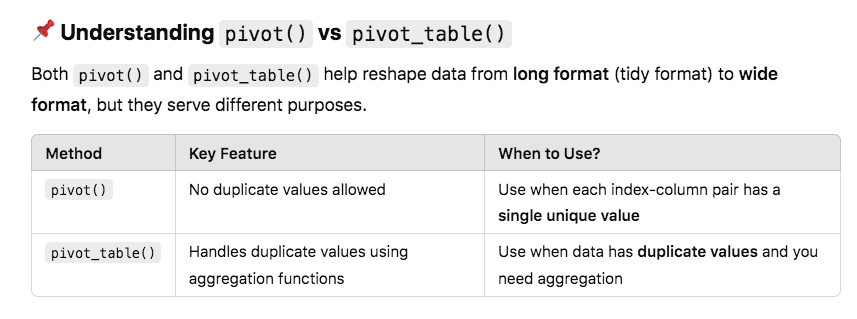

In [ ]:
import pandas as pd
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}


df = pd.DataFrame(data)
print(df)


    value variable       date
0       0        A 2020-01-03
1       1        A 2020-01-04
2       2        A 2020-01-05
3       3        B 2020-01-03
4       4        B 2020-01-04
5       5        B 2020-01-05
6       6        C 2020-01-03
7       7        C 2020-01-04
8       8        C 2020-01-05
9       9        D 2020-01-03
10     10        D 2020-01-04
11     11        D 2020-01-05


In [ ]:
pivoted = df.pivot(index="date", columns="variable", values="value")

pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


In [ ]:
df["value2"] = df["value"] * 2

pivoted = df.pivot(index="date", columns="variable")

pivoted

value           value2            
variable       A  B  C   D      A   B   C   D
date                                         
2020-01-03     0  3  6   9      0   6  12  18
2020-01-04     1  4  7  10      2   8  14  20
2020-01-05     2  5  8  11      4  10  16  22

**pandas.crosstab()**

**crosstab()** presents data in a tabular format, showing how one variable is distributed across another.

By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

It helps answer questions like:

- How many students scored each grade in different subjects?

- How does gender distribution vary across different departments?

- What is the count of different product categories sold in each region?

Let’s say we have survey data about people's preferences for coffee or tea across different age groups.



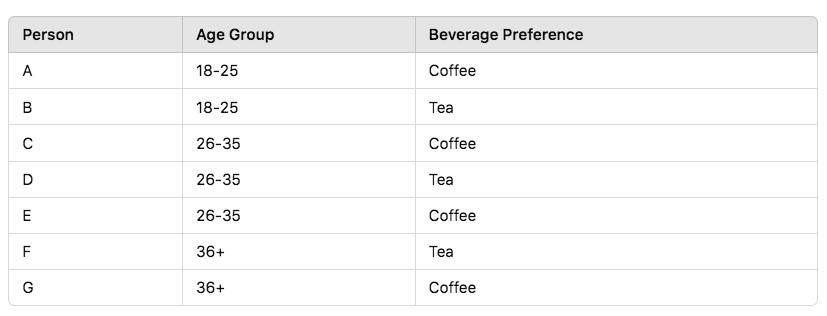

In [2]:
import pandas as pd

# Creating the dataset
df = pd.DataFrame({
    'Age Group': ['18-25', '18-25', '26-35', '26-35', '26-35', '36+', '36+'],
    'Beverage': ['Coffee', 'Tea', 'Coffee', 'Tea', 'Coffee', 'Tea', 'Coffee']
})

# Crosstab to count occurrences
result = pd.crosstab(df['Age Group'], df['Beverage'])
print(result)


Beverage   Coffee  Tea
Age Group             
18-25           1    1
26-35           2    1
36+             1    1


In [1]:
import numpy as np
import pandas as pd
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

**Comparing groupby(), pivot_table(), and crosstab()**


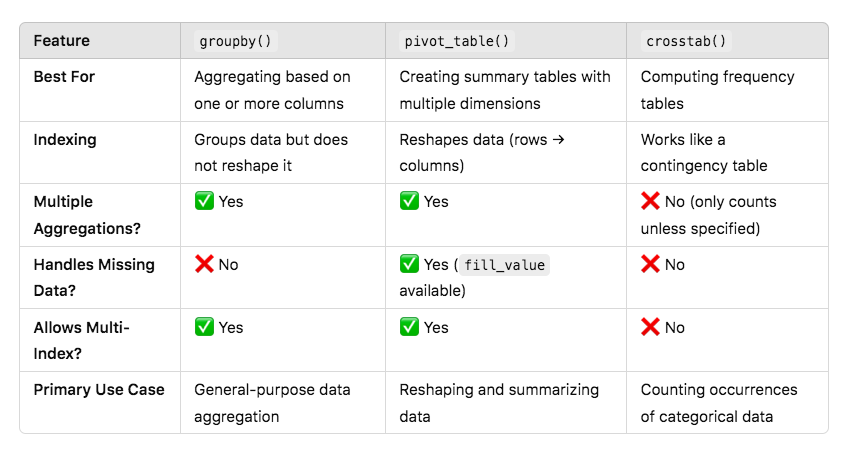